데이터 : 2021.4 wish.com 검색어 별 상품 정보 (상품명, 판매량, 평점, 판매자, 판매자 평점 등)

분석 : 판매량 예측


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 패션 관련 검색어 데이터

url1 = 'C://Users//tkryu//Desktop//빅데이터 공부//Code States//Section 2//Project//raw_data//bodysuit.csv'
url2 = 'C://Users//tkryu//Desktop//빅데이터 공부//Code States//Section 2//Project//raw_data//dress.csv'
url3 = 'C://Users//tkryu//Desktop//빅데이터 공부//Code States//Section 2//Project//raw_data//fashion.csv'
url4 = 'C://Users//tkryu//Desktop//빅데이터 공부//Code States//Section 2//Project//raw_data//girl.csv'
url5 = 'C://Users//tkryu//Desktop//빅데이터 공부//Code States//Section 2//Project//raw_data//pullover.csv'
url6 = 'C://Users//tkryu//Desktop//빅데이터 공부//Code States//Section 2//Project//raw_data//top.csv'
url7 = 'C://Users//tkryu//Desktop//빅데이터 공부//Code States//Section 2//Project//raw_data//tops.csv'
url8 = 'C://Users//tkryu//Desktop//빅데이터 공부//Code States//Section 2//Project//raw_data//woman.csv'
url9 = 'C://Users//tkryu//Desktop//빅데이터 공부//Code States//Section 2//Project//raw_data//women.csv'
url10 = 'C://Users//tkryu//Desktop//빅데이터 공부//Code States//Section 2//Project//raw_data//womens.csv'

data1 = pd.read_csv(url1)
data2 = pd.read_csv(url2)
data3 = pd.read_csv(url3)
data4 = pd.read_csv(url4)
data5 = pd.read_csv(url5)
data6 = pd.read_csv(url6)
data7 = pd.read_csv(url7)
data8 = pd.read_csv(url8)
data9 = pd.read_csv(url9)
data10 = pd.read_csv(url10)

# 데이터 합치기
full_data1 = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8, data9, data10])
full_data1.reset_index(inplace = True, drop = True)
len(full_data1)

9254

In [3]:
# 카테고리 특성 생성 (검색어 별로)

data1['category'] = 'bodysuit'
data2['category'] = 'dress'
data3['category'] = 'fashion'
data4['category'] = 'girl'
data5['category'] = 'pullover'
data6['category'] = 'top'
data7['category'] = 'tops'
data8['category'] = 'womens'
data9['category'] = 'womens'
data10['category'] = 'womens'

In [4]:
# 카테고리 생성한 데이터 합치기
# 중복값 제거를 위해 따로 생성 (카테고리 값이 다르므로 중복값을 제대로 못 잡아낼 수 있음)

full_data2 = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8, data9, data10])
full_data2.reset_index(inplace = True, drop = True)
full_data2.index

RangeIndex(start=0, stop=9254, step=1)

In [5]:
# 중복값 확인 (data1)
full_data1.duplicated().sum()

825

In [6]:
# 첫번째 데이터셋에서 중복값 뽑기
duplicated_df = full_data1[full_data1.duplicated()]
duplicated_df

,title,title_orig,discount_price,discount_price_currency,retail_price,retail_price_currency,discount_price_in_original_currency,nb_cart_orders_approx,nb_units_purchased_approx,uses_ad_boosts,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id
931,RIDERACT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.wish.com/c/5f2a918f90b8a6806b950572,NaN,5f2a918f90b8a6806b950572
932,Pink Floyd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.wish.com/c/5e8d2fce9719ed6404967680,NaN,5e8d2fce9719ed6404967680
945,Jack Daniel's,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.wish.com/c/5e8d30069719ed64049677e3,NaN,5e8d30069719ed64049677e3
946,Adidas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.wish.com/c/5e542cf79719ed19e8484831,NaN,5e542cf79719ed19e8484831
954,BALEAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.wish.com/c/5f181ca7eb31f9ef295d51dc,NaN,5f181ca7eb31f9ef295d51dc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9220,berikbrand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.wish.com/c/5f327a9190b8a62e154b84c3,NaN,5f327a9190b8a62e154b84c3
9227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.wish.com/c/60846dd13ffc4e0010bcc0db,NaN,60846dd13ffc4e0010bcc0db
9230,Damenmode Daisy Print Shirt Lässig Kurzarm O-A...,Women's Fashion Daisy Print Shirt Casual Short...,10.0,CHF,10.0,CHF,11.0,1000.0,NaN,NaN,...,pwiuxuus,"87% Positives Feedback (6,978 Bewertungen)",6978.0,4.114359,5ae3d438c1d5187ae0dcea90,NaN,NaN,https://www.wish.com/c/5ea689f78f9f700229cccef9,https://canary.contestimg.wish.com/api/webimag...,5ea689f78f9f700229cccef9
9234,Captain America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.wish.com/c/5ed7832f90b8a6318c2d7385,NaN,5ed7832f90b8a6318c2d7385


In [7]:
# 2번째 데이터셋에서 중복값의 인덱스를 드랍

full_data_drop = full_data2.drop(duplicated_df.index, axis = 0)
len(full_data_drop)

8429

In [8]:
# 타겟값이 결측인 데이터 드랍. (주로 다른 데이터도 결측인 듯)
drop_na = full_data_drop[full_data_drop['nb_cart_orders_approx'].isnull()]

full_data_drop.drop(drop_na.index, axis = 0, inplace = True)

In [9]:
len(full_data_drop)

8240

In [10]:
# 결측치 확인
full_data_drop.isnull().sum()

title                                     0
title_orig                                0
discount_price                            0
discount_price_currency                   0
retail_price                              0
retail_price_currency                     0
discount_price_in_original_currency       0
nb_cart_orders_approx                     0
nb_units_purchased_approx              8240
uses_ad_boosts                         8240
rating                                    0
rating_count                              0
rating_five_count                      1122
rating_four_count                      1122
rating_three_count                     1122
rating_two_count                       1122
rating_one_count                       1122
badges_count                           8240
badge_local_product                    8240
badge_product_quality                  8240
badge_fast_shipping                    8240
tags                                   8240
product_color                   

# EDA & Feature Engineer

In [11]:
# 변수명 단순화
fdr = full_data_drop.copy()

## Currency(통화) 관련 항목
- 통화의 종류 확인
- retail과 discount price의 통화는 같다. (중복 칼럼)
- 가격정보가 없는 상품 9개, retail / discount price 모두 없음
<br/>
<br/>

**Engineering**
- 통화의 종류 자체는 영향을 줄 수 있으니, 그대로 두고 가격만 유로로 통일시켜보자
- CHF : EUR = 1 : 0.91
- USD : EUR = 1 : 0.84
- retail currency와 discount currency가 같으므로, 하나를 드랍, 'currency'로 이름 변경
- 가격정보가 없는 상품은 드랍. (페이지도 삭제되어 정보를 구할 수 없음, 카테고리 구분이 제대로 되어 있지 않아서 다른 값으로 결측치를 넣기도 힘듦)

In [12]:
fdr['retail_price_currency'].value_counts()

EUR    5692
CHF    2460
USD      88
Name: retail_price_currency, dtype: int64

In [13]:
fdr['discount_price_currency'].value_counts()

EUR    5692
CHF    2460
USD      88
Name: discount_price_currency, dtype: int64

<AxesSubplot:xlabel='discount_price_currency', ylabel='count'>

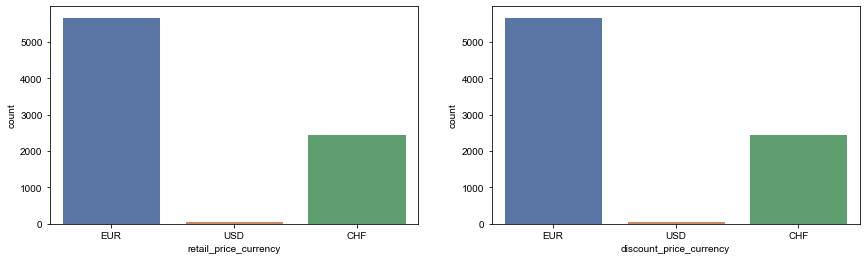

In [14]:
# 시각화 비교


fig, ax = plt.subplots(1,2)
plt.subplots_adjust(left=None, bottom=None, right=2, top=None, wspace=None, hspace=None)

sns.set_theme(style='darkgrid')
sns.countplot(ax = ax[0], data = fdr, x='retail_price_currency')
sns.countplot(ax = ax[1], data = fdr, x='discount_price_currency')


In [15]:
# # engineering 함수는 추후에 한번에 적용

# def engineering(df):
#     # currency 관련 
#     CHF_index = fdr[fdr['retail_price_currency'] == 'CHF'].index
#     df.loc[CHF_index, 'retail_price'] = df.loc[CHF_index, 'retail_price'] * 0.91
#     df.loc[CHF_index, 'discount_price'] = df.loc[CHF_index, 'discount_price'] * 0.91
#     full_data_drop.loc[CHF_index, 'shipping_option_price'] = full_data_drop.loc[CHF_index, 'shipping_option_price'] * 0.91
    
#     USD_index = df[df['retail_price_currency'] == 'USD'].index
#     df.loc[USD_index, 'retail_price'] = df.loc[USD_index, 'retail_price'] * 0.84
#     df.loc[USD_index, 'discount_price'] = df.loc[USD_index, 'discount_price'] * 0.84
#     full_data_drop.loc[USD_index, 'shipping_option_price'] = full_data_drop.loc[USD_index, 'shipping_option_price'] * 0.84
    
#     df.rename(columns={"retail_price_currency": "currency"})
    
#     # price 관련
#     no_price_info = df[df['discount_price'] == 0]
#     df.drop(no_price_info.index, axis = 0, inplace = True)

In [16]:
fdr[fdr['discount_price'] == 0]

,title,title_orig,discount_price,discount_price_currency,retail_price,retail_price_currency,discount_price_in_original_currency,nb_cart_orders_approx,nb_units_purchased_approx,uses_ad_boosts,...,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,category
2805,150 pièces jetable Màsk Childen bouclier facia...,150pcs Disposable Màsk Childen Face Shield Bre...,0.0,EUR,0.0,EUR,0.0,10.0,NaN,NaN,...,"92 % avis positifs (16,758 notes)",16758.0,4.345268,57b595a5a284ca067f319edb,NaN,NaN,https://www.wish.com/c/5f98dac706f4aa084221ba17,https://canary.contestimg.wish.com/api/webimag...,5f98dac706f4aa084221ba17,girl
2905,2021 nouveau respirateur Cubrebocas masque chi...,2021 New Respirator Cubrebocas Disposable Surg...,0.0,EUR,0.0,EUR,0.0,10.0,NaN,NaN,...,83 % avis positifs (29 notes),29.0,4.000000,5eb3cc0d06eb8d004bdde334,NaN,NaN,https://www.wish.com/c/602b79b56d16700054921a35,https://canary.contestimg.wish.com/api/webimag...,602b79b56d16700054921a35,girl
3305,FFP2 Mascarillas KN95 masque enfants 5 couches...,FFP2 Mascarillas KN95 Kids Mask 5 Layers Face ...,0.0,EUR,0.0,EUR,0.0,1000.0,NaN,NaN,...,92 % avis positifs (444 notes),444.0,4.373874,58298f440299bc1b499293d3,NaN,NaN,https://www.wish.com/c/5ff2d52c83e2b958121b6c33,https://canary.contestimg.wish.com/api/webimag...,5ff2d52c83e2b958121b6c33,girl
6611,2 pièces / ensemble élégante femme noble bijou...,2 Pieces / Set Elegant Noble Woman Fashion Jew...,0.0,EUR,0.0,EUR,0.0,5000.0,NaN,NaN,...,"90 % avis positifs (30,732 notes)",30732.0,4.280815,5aa7861eb722cf6a46c63a32,NaN,NaN,https://www.wish.com/c/5ec002c3e5bfb172760eba7c,https://canary.contestimg.wish.com/api/webimag...,5ec002c3e5bfb172760eba7c,womens
6717,2Pcs / Ensemble De Luxe Noble et Élégant Belle...,2Pcs/Set Luxury Noble and Elegant Beautiful Wo...,0.0,EUR,0.0,EUR,0.0,10.0,NaN,NaN,...,"87 % avis positifs (2,969 notes)",2969.0,4.161334,5d53a3c33db43e5101f40182,NaN,NaN,https://www.wish.com/c/5fbbd41fe46d1d9d7f534beb,https://canary.contestimg.wish.com/api/webimag...,5fbbd41fe46d1d9d7f534beb,womens
6977,Mode luxe diamant noir Couple bague diamant fi...,Fashion Luxury Black Diamond Couple Ring Diamo...,0.0,EUR,0.0,EUR,0.0,1000.0,NaN,NaN,...,"92 % avis positifs (1,152 notes)",1152.0,4.341146,5f3c8516e09a35da28906a4f,NaN,NaN,https://www.wish.com/c/5f49f80fc1ddf3029b76b410,https://canary.contestimg.wish.com/api/webimag...,5f49f80fc1ddf3029b76b410,womens
7024,Élégante Noble Femme Mode Coeur Bague Superbe ...,Elegant Noble Woman Fashion Heart Ring Superb ...,0.0,EUR,0.0,EUR,0.0,5000.0,NaN,NaN,...,"90 % avis positifs (30,732 notes)",30732.0,4.280815,5aa7861eb722cf6a46c63a32,NaN,NaN,https://www.wish.com/c/5edbadd6ab01de438901a75a,https://canary.contestimg.wish.com/api/webimag...,5edbadd6ab01de438901a75a,womens
7260,Élégante belle femme mode luxe 18 carats bijou...,Elegant Beautiful Woman Fashion Luxury 18K Gol...,0.0,EUR,0.0,EUR,0.0,1000.0,NaN,NaN,...,"89 % avis positifs (23,905 notes)",23905.0,4.243338,5a96a99708a2241d6b6e04f0,NaN,NaN,https://www.wish.com/c/5f68e2505167ffd45ab53182,https://canary.contestimg.wish.com/api/webimag...,5f68e2505167ffd45ab53182,womens
7380,14k or gravé à la main vague bord anneau hawaï...,14k Gold Hand Engraved Wave Edge Ring Hawaiian...,0.0,EUR,0.0,EUR,0.0,20000.0,NaN,NaN,...,87 % avis positifs (135 notes),135.0,4.059259,5fe5a4086a1cf8bc93ccfd28,NaN,NaN,https://www.wish.com/c/6017b642c1e48528f7d75020,https://canary.contestimg.wish.com/api/webimag...,6017b642c1e48528f7d75020,womens


In [17]:
fdr[fdr['retail_price'] == 0]

,title,title_orig,discount_price,discount_price_currency,retail_price,retail_price_currency,discount_price_in_original_currency,nb_cart_orders_approx,nb_units_purchased_approx,uses_ad_boosts,...,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,category
2805,150 pièces jetable Màsk Childen bouclier facia...,150pcs Disposable Màsk Childen Face Shield Bre...,0.0,EUR,0.0,EUR,0.0,10.0,NaN,NaN,...,"92 % avis positifs (16,758 notes)",16758.0,4.345268,57b595a5a284ca067f319edb,NaN,NaN,https://www.wish.com/c/5f98dac706f4aa084221ba17,https://canary.contestimg.wish.com/api/webimag...,5f98dac706f4aa084221ba17,girl
2905,2021 nouveau respirateur Cubrebocas masque chi...,2021 New Respirator Cubrebocas Disposable Surg...,0.0,EUR,0.0,EUR,0.0,10.0,NaN,NaN,...,83 % avis positifs (29 notes),29.0,4.000000,5eb3cc0d06eb8d004bdde334,NaN,NaN,https://www.wish.com/c/602b79b56d16700054921a35,https://canary.contestimg.wish.com/api/webimag...,602b79b56d16700054921a35,girl
3305,FFP2 Mascarillas KN95 masque enfants 5 couches...,FFP2 Mascarillas KN95 Kids Mask 5 Layers Face ...,0.0,EUR,0.0,EUR,0.0,1000.0,NaN,NaN,...,92 % avis positifs (444 notes),444.0,4.373874,58298f440299bc1b499293d3,NaN,NaN,https://www.wish.com/c/5ff2d52c83e2b958121b6c33,https://canary.contestimg.wish.com/api/webimag...,5ff2d52c83e2b958121b6c33,girl
6611,2 pièces / ensemble élégante femme noble bijou...,2 Pieces / Set Elegant Noble Woman Fashion Jew...,0.0,EUR,0.0,EUR,0.0,5000.0,NaN,NaN,...,"90 % avis positifs (30,732 notes)",30732.0,4.280815,5aa7861eb722cf6a46c63a32,NaN,NaN,https://www.wish.com/c/5ec002c3e5bfb172760eba7c,https://canary.contestimg.wish.com/api/webimag...,5ec002c3e5bfb172760eba7c,womens
6717,2Pcs / Ensemble De Luxe Noble et Élégant Belle...,2Pcs/Set Luxury Noble and Elegant Beautiful Wo...,0.0,EUR,0.0,EUR,0.0,10.0,NaN,NaN,...,"87 % avis positifs (2,969 notes)",2969.0,4.161334,5d53a3c33db43e5101f40182,NaN,NaN,https://www.wish.com/c/5fbbd41fe46d1d9d7f534beb,https://canary.contestimg.wish.com/api/webimag...,5fbbd41fe46d1d9d7f534beb,womens
6977,Mode luxe diamant noir Couple bague diamant fi...,Fashion Luxury Black Diamond Couple Ring Diamo...,0.0,EUR,0.0,EUR,0.0,1000.0,NaN,NaN,...,"92 % avis positifs (1,152 notes)",1152.0,4.341146,5f3c8516e09a35da28906a4f,NaN,NaN,https://www.wish.com/c/5f49f80fc1ddf3029b76b410,https://canary.contestimg.wish.com/api/webimag...,5f49f80fc1ddf3029b76b410,womens
7024,Élégante Noble Femme Mode Coeur Bague Superbe ...,Elegant Noble Woman Fashion Heart Ring Superb ...,0.0,EUR,0.0,EUR,0.0,5000.0,NaN,NaN,...,"90 % avis positifs (30,732 notes)",30732.0,4.280815,5aa7861eb722cf6a46c63a32,NaN,NaN,https://www.wish.com/c/5edbadd6ab01de438901a75a,https://canary.contestimg.wish.com/api/webimag...,5edbadd6ab01de438901a75a,womens
7260,Élégante belle femme mode luxe 18 carats bijou...,Elegant Beautiful Woman Fashion Luxury 18K Gol...,0.0,EUR,0.0,EUR,0.0,1000.0,NaN,NaN,...,"89 % avis positifs (23,905 notes)",23905.0,4.243338,5a96a99708a2241d6b6e04f0,NaN,NaN,https://www.wish.com/c/5f68e2505167ffd45ab53182,https://canary.contestimg.wish.com/api/webimag...,5f68e2505167ffd45ab53182,womens
7380,14k or gravé à la main vague bord anneau hawaï...,14k Gold Hand Engraved Wave Edge Ring Hawaiian...,0.0,EUR,0.0,EUR,0.0,20000.0,NaN,NaN,...,87 % avis positifs (135 notes),135.0,4.059259,5fe5a4086a1cf8bc93ccfd28,NaN,NaN,https://www.wish.com/c/6017b642c1e48528f7d75020,https://canary.contestimg.wish.com/api/webimag...,6017b642c1e48528f7d75020,womens


## 판매량 (Target 항목)
 - "nb_cart_orders_approx"은 장바구니에 담긴 횟수를 뜻하는 것 같지만, "units_purchased" 항목이 전부 결측이므로, 이 항목을 타겟으로 설정
<br/>   
<br/>  

**Engineering**
 - 값들이 범주로 나눠져 있는 것을 알 수 있음
 - 1단위 숫자들만 이상치로 여겨짐
 - 해당 숫자를 10으로 통일

In [18]:
fdr['nb_cart_orders_approx'].value_counts()

10.0        3452
1000.0      2167
5000.0       718
0.0          573
10000.0      511
20000.0      346
1.0          149
50000.0       62
2.0           48
4.0           45
3.0           42
5.0           36
9.0           21
6.0           21
8.0           19
7.0           17
100000.0      13
Name: nb_cart_orders_approx, dtype: int64

<AxesSubplot:xlabel='nb_cart_orders_approx', ylabel='count'>

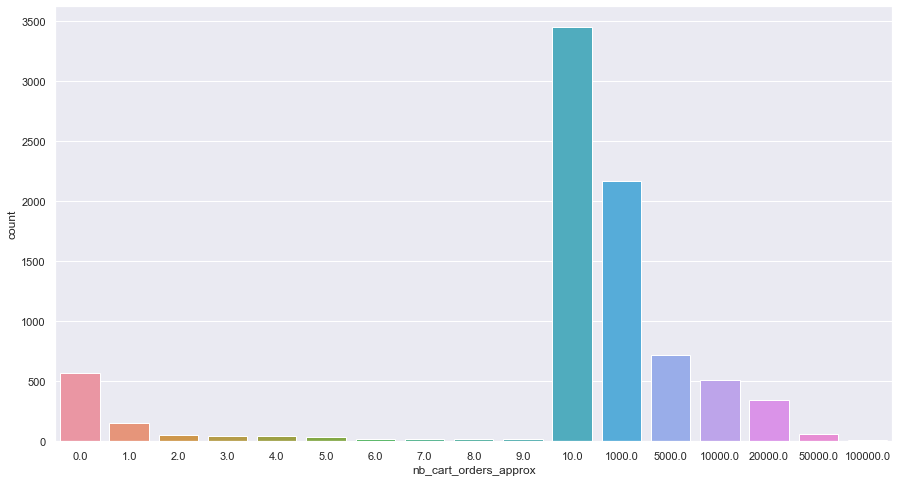

In [19]:
sns.set_theme(style='darkgrid')
fig, ax = plt.subplots(figsize = (15,8))
sns.countplot(ax = ax, data = fdr, x='nb_cart_orders_approx')

In [20]:
# # engineering 함수는 추후에 한번에 적용

# def engineering(df):
    
#     # Target (판매량) 관련
#     order_under_10 = df[df['nb_cart_orders_approx'] <= 10 ]
#     df.loc[order_under_10.index, 'nb_cart_orders_approx'] = 10

## Shipping option 관련 항목
- shipping options은 standard & express 두 가지 밖에 없다.
- shipping option name과 express 배송 가능 여부 항목 2가지가 있다.  
<br/>
<br/>

**Engineering**
- express 배송을 지원하느냐는 항목이 또 있으므로, option name 항목은 쓰지 않기로 한다. 
- express 지원 여부 항목은 0, 1로 바꾼다.

In [21]:
fdr['shipping_option_name'].value_counts()

Livraison standard    7585
Livraison Express      655
Name: shipping_option_name, dtype: int64

In [22]:
full_data_drop['shipping_is_express'].value_counts()

False    7585
True      655
Name: shipping_is_express, dtype: int64

<AxesSubplot:xlabel='shipping_is_express', ylabel='count'>

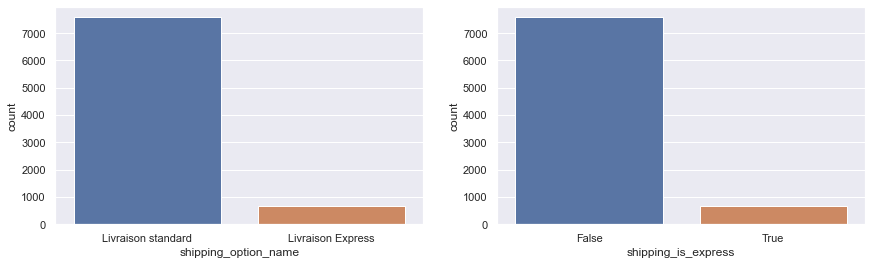

In [23]:
fig, ax = plt.subplots(1,2)
plt.subplots_adjust(left=None, bottom=None, right=2, top=None, wspace=None, hspace=None)

sns.set_theme(style='darkgrid')
sns.countplot(ax = ax[0], data = fdr, x='shipping_option_name')
sns.countplot(ax = ax[1], data = fdr, x='shipping_is_express')

In [24]:
# # engineering 함수는 추후에 한번에 적용

# def engineering(df):
    
#     # shipping option 관련
#     express_false = df[df['shipping_is_express'] == False]
#     express_true = df[df['shipping_is_express'] == True]

#     df.loc[express_false.index, 'shipping_is_express'] = 0
#     df.loc[express_true.index, 'shipping_is_express'] = 1
    
#     df.drop('shipping_option_name', axis = 1, inplace = True)

## Urgency banner 관련
- 일종의 광고 (마감임박 등) 존재 여부, 있으면 True, 없으면 결측  
<br/>
<br/>

**Engineering**
- 0,1로 대체한다.
- Ture => 1
- 결측치는 0으로 fill
- urgency banner text 항목은 드랍. (광고를 사용하느냐 안하느냐 여부만 있으면 된다고 판단됨)

In [25]:
fdr['has_urgency_banner'].value_counts()

True    2129
Name: has_urgency_banner, dtype: int64

In [26]:
# # engineering 함수는 추후에 한번에 적용

# def engineering(df):
    
#     # urgency_banner 관련
#     urgency_banner_true = df[df['has_urgency_banner'] == True]
#     df.loc[urgency_banner_true.index, 'has_urgency_banner'] = 1
#     df['has_urgency_banner'].fillna(0, inplace=True)
#     df.drop('urgency_text', axis = 1, inplace = True)
    

## Origin Country 
 - 원산지 정보.
 - 카디널리티가 높다.

**Engineering**
 - 개별 항목이 차지하는 비율이 5%가 넘지 않는 것들은 others로 묶는다.

In [27]:
fdr['origin_country'].value_counts()

CN    6679
US     551
CA     452
GB     128
PL      67
FR      51
KR      31
DE      25
ES      24
VN      23
SG      22
VE      21
TR      19
NL      11
AU       7
RS       7
IT       5
PK       5
TH       4
RU       3
IN       3
GR       3
CR       2
PE       2
MD       1
PH       1
CH       1
HR       1
PA       1
JP       1
CO       1
BE       1
Name: origin_country, dtype: int64

<AxesSubplot:xlabel='origin_country', ylabel='count'>

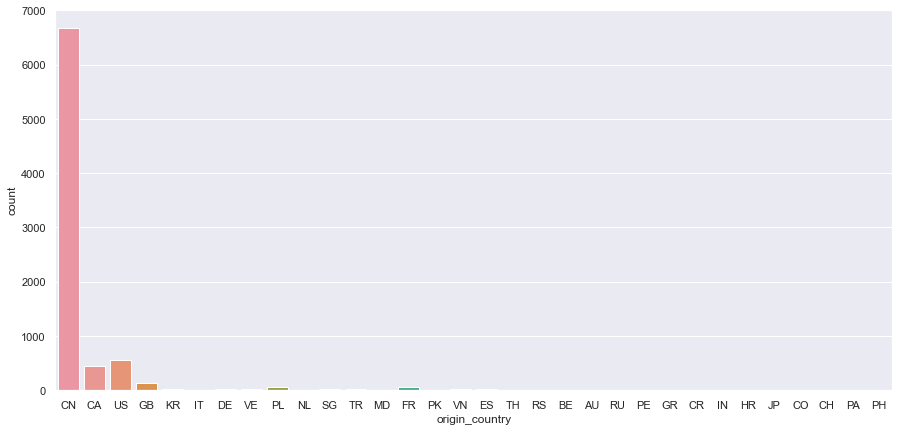

In [28]:
plt.figure(figsize = (15, 7))
sns.countplot(data = fdr, x = 'origin_country')

In [29]:
# 3등 CA 원산지의 비율 = 5%
print(452 / 8240)

# 4등 GB 원산지의 비율 = 1.5%
# GB부터 아래로는 others로
print(128 / 8240)

0.054854368932038836
0.015533980582524271


In [30]:
# # engineering 함수는 추후에 한번에 적용

# def engineering(df):
    
#     # origin_country 관련
#     origin_list = df['origin_country'].unique()
#     origin_remain = ['CN', 'US', 'CA']
#     origin_list_other = origin_list.tolist()

#     for i in origin_remain :
#         origin_list_other.remove(i)

#     origin_other = df[df['origin_country'].isin(origin_list_other)]
#     df.loc[origin_other.index, 'origin_country'] = 'other'
    

## Creating new features
- Category 항목 : 데이터가 검색어 별로 나온 제품들의 데이터를 합친 것이므로, 검색어 항목을 생성 가능

- 가격 관련 항목이 discount와 retail로 2개로 나누어져 있음  
    -> 할인율을 항목 만들기 (retail_price 항목은 drop)
    
    
- size, color 항목이 제대로 나와있지 않음 (사이즈 및 컬러가 여러개일텐데, 하나씩만 표기되어 있음)
    -> size항목은 표에 있는 상품별 url을 바탕으로 크롤링하여 사이즈 종류의 개수와 사이즈 종류의 항목을 생성
    -> color 항목은 크롤링 실패로 분석에 사용하지 않음

In [31]:
# # engineering 함수는 추후에 한번에 적용

# def engineering(df):
    
#     # 할인률 관련
#     full_data_drop['discount_rate'] = 1 - full_data_drop['discount_price']/full_data_drop['retail_price']
#     df.drop('retail_price', axis  = 1, inplace = True)

In [32]:
### 주석 풀지 말 것 ###

# # size 정보 크롤링 
# # 따로 실행해서 csv로 저장한 후, 해당 csv파일을 이번에 사용하는 데이터셋에 합침 


# from urllib.request import urlopen
# from bs4 import BeautifulSoup
# import requests
# from urllib.error import HTTPError

# # 칼럼 미리 생성
# df['size_var'] = np.nan
# df['size_list'] = np.nan

# # 반복을 통해 상품별 url을 읽고, size 정보를 가져온다. 
# # 에러가 날 경우 다음 순서로 넘어간다.
# # 사이즈 정보를 미리 생성해둔 칼럼에 넣는다.
# for i in range(0, len(df)): 
#     url = df['product_url'][i] 
#     try: html = urlopen(url) 
#     except HTTPError: continue

#     html = urlopen(url)
#     bsObject = BeautifulSoup(html, 'html.parser')

#     x = 0
#     size_list = []
#     # 반복문을 통해 리스트되어있는 사이즈를 하나씩 가져오기. 
#     # 매번 사이즈 개수가 다르기 때문에 while 사용
#     # 그 다음 사이즈 정보가 없으면 반복문 종료
#     while True:
#         try: bsObject.find('div', {'class' : 'WishSelectInput__SelectBoxDropdown-sc-1gl2ax5-3'}).find('div', {'data-index' : x})
#         except AttributeError:
#             break

#         size = bsObject.find('div', {'class' : 'WishSelectInput__SelectBoxDropdown-sc-1gl2ax5-3'}).find('div', {'data-index' : x})
#         if size == None: break
#         size_list.append(size.text)
#         x += 1
#     df['size_var'][i] = len(size_list)
#     df['size_list'][i] = size_list
#     print("\n",i ,size_list, len(size_list))
    
    
# df.to_csv('size_added.csv')

In [33]:
# 크롤링한 파일 불러와서 합치기
url_crawl = 'C://Users//tkryu//Desktop//빅데이터 공부//Code States//Section 2//Project//size_added.csv'
size_crawl = pd.read_csv(url_crawl)
fdr = fdr.reset_index(drop = True)
fdr[['size_var', 'size_list']] = size_crawl[['size_var','size_list']]

## size_var 항목 (추가한 항목)

- 판매하는 사이즈의 개수
- 0부터 168까지 있음. (사이즈의 개수가 168임이 말이 안되므로 이상치가 있다고 판단됨)
- 0은 사이즈 정보가 없는 것 = one size인 줄 알고 1로 바꾸려 했으나, 해당 상품들의 페이지를 직접 들어가보니 매진 상품이었음
    -> 따라서 지금 사이즈 정보를 제대로 얻을 수 없음. 0으로 일단 놔둠
- 너무 높은 이상치의 경우 탐색해보니, 컬러와 사이즈 구분이 제대로 안되어 있고 모두 사이즈 항목에서 구분되어있음. 즉 사이즈 정보만 있는 것이 아님.
- xs, s, m, l, xl, xxl, 3xl, 4xl, 5xl (일반적인 사이즈 구분 8 ~ 9개)
- 9개로만 잡을 경우, 이상치가 1308로 생각보다 많음. 또한, 키즈 사이즈까지 있는 상품들이 있어서 기준을 늘려도 될 듯.
- 결측치는 판매 페이지가 없어졌거나, 사이즈 정보가 아예 없거나(one-size), 크롤링 과정 중 에러로 넘어간 부분.
<br/>
<br/>

**Engineering**
- 일단 전체 데이터의 10%인 824를 기준으로, 824개가 넘는 수부터 이상치로 판단, 그 이전 최대값으로 변환
- 12개까지 정상수치라고 보면, 이상치는 687개, 양호한 수치로 판단되어 13부터는 모두 12로 변환
- 결측치 0으로 대체

In [34]:
# 이상치가 많음
fdr.size_var.unique()

array([  5.,  18.,   7.,   4.,   1.,   9.,   8.,   3.,   6.,   0.,  17.,
        11.,   2.,  nan,  10.,  14.,  13.,  22.,  12.,  21.,  15.,  16.,
        45.,  30.,  27.,  24.,  34.,  38.,  33.,  37.,  44.,  19.,  52.,
        35.,  29.,  36.,  39.,  47.,  25.,  28.,  26.,  59.,  42.,  55.,
        90.,  31., 168.,  48.,  32.,  60.,  68.,  20., 240.,  23.,  78.,
        46.,  43., 102.,  51.,  41.,  40.,  63., 120., 129., 125.,  56.,
       138.,  62.,  50.])

In [35]:
# 이상치 데이터를 탐색해보니, 컬러와 사이즈 구분이 모두 사이즈항목으로만 되어있음. 즉, 사이즈 정보만 있는 것이 아님.
print(fdr.loc[3851, 'size_list'])
print(fdr.loc[3851, 'product_url'])

['1-90(Child)', '2-90(Child)', '3-90(Child)', '4-90(Child)', '5-90(Child)', '6-90(Child)', '7-90(Child)', '8-90(Child)', '1-100(Child)', '2-100(Child)', '3-100(Child)', '4-100(Child)', '5-100(Child)', '6-100(Child)', '7-100(Child)', '8-100(Child)', '1-110(Child)', '2-110(Child)', '3-110(Child)', '4-110(Child)', '5-110(Child)', '6-110(Child)', '7-110(Child)', '8-110(Child)', '1-120(Child)', '2-120(Child)', '3-120(Child)', '4-120(Child)', '5-120(Child)', '6-120(Child)', '7-120(Child)', '8-120(Child)', '1-130(Child)', '2-130(Child)', '3-130(Child)', '4-130(Child)', '5-130(Child)', '6-130(Child)', '7-130(Child)', '8-130(Child)', '1-140(Child)', '1-150(Child)', '1-160(Child)', '2-140(Child)', '2-150(Child)', '2-160(Child)', '3-140(Child)', '3-150(Child)', '3-160(Child)', '4-140(Child)', '4-150(Child)', '4-160(Child)', '5-140(Child)', '5-150(Child)', '5-160(Child)', '6-140(Child)', '6-150(Child)', '6-160(Child)', '7-140(Child)', '7-150(Child)', '7-160(Child)', '8-140(Child)', '8-150(Child)',

In [36]:
# 일단 전체 데이터의 10%인 824를 기준으로, 824개가 넘는 개수부터 이상치로 판단, 그 전 최대값으로 변환
len(fdr) * 0.10

824.0

In [37]:
# xs, s, m, l, xl, xxl, 3xl, 4xl, 5xl (일반적인 사이즈 구분 8 ~ 9개)
# 9개로만 잡을 경우, 이상치가 1308로 생각보다 많음. 또한, 키즈 사이즈까지 있는 상품들이 있어서 기준을 늘려도 될 듯.
print(len(fdr[fdr['size_var'] > 9]))

# 일단 전체 개수의 10%를 기준으로 잡기로 함
# 12개 부터 10% 아래로 내려감
print(len(fdr[fdr['size_var'] > 12]))

1308
687


In [38]:
# def engineering(df):
    
#     # 사이즈 개수 이상치 & 결측치 처리
#     size_over_12 = df[df['size_var'] > 12]
#     df.loc[size_over_12.index, 'size_var'] = 12
#     df.size_var.fillna(0, inplace=True)
    

## drop 시킬 항목
 - 'title', 'title_orig' : 제품명으로 분석에 의미 없음
 - 'discount_price_currency' : retail_price_currency와 중복이므로 드랍
 - 'discount_price_in_original_currency' : 기존 통화에서의 가격은 의미가 없을 것이라 생각됨
 - 'nb_units_purchased_approx' : 전부 결측치
 - 'uses_ad_boosts' : 전부 결측치
 - 'rating_five_count', 'rating_four_count', 'rating_three_count','rating_two_count', 'rating_one_count' : 평점 평균과 리뷰 개수 항목이 있으므로 중복될 것.
 - 'badges_count', 'badge_local_product', 'badge_product_quality', 'badge_fast_shipping', 'tags' : 전부 결측치
 - 'product_color', 'product_variation_size_id' : 데이터가 제대로 된 데이터가 아님
 - 'product_variation_inventory' : 소비자가 알 수 있는 정보가 아님
 - 'shipping_option_name' : 'shipping_is_express'와 파악할 수 있는 정보가 동일. 중복된 정보
 - 'countries_shipped_to' : 전부 결측치
 - 'inventory_total' : 소비자가 알 수 있는 정보가 아님
 - 'urgency_text' : 'urgency_banner' 항목과 중복된 정보
 - 'merchant_title', 'merchant_name', 'merchant_info_subtitle', 'merchant_id' : 판매자 명으로 분석에 의미 없음
 - 'merchant_has_profile_picture', 'merchant_profile_picture' : 전부 결측치
 - 'product_url', 'product_picture', 'product_id' : 분석에 의미 없음
 - 'size_list' : 어떻게 활용할 지 모르겠음...

In [39]:
fdr.columns

Index(['title', 'title_orig', 'discount_price', 'discount_price_currency',
       'retail_price', 'retail_price_currency',
       'discount_price_in_original_currency', 'nb_cart_orders_approx',
       'nb_units_purchased_approx', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'produc

In [40]:
drop_list = ['title', 'title_orig', 'discount_price_currency', 'discount_price_in_original_currency', 'nb_units_purchased_approx',
            'uses_ad_boosts', 'rating_five_count', 'rating_four_count', 'rating_three_count','rating_two_count', 'rating_one_count',
            'badges_count', 'badge_local_product', 'badge_product_quality', 'badge_fast_shipping', 'tags','product_color', 'product_variation_size_id',
            'product_variation_inventory', 'shipping_option_name', 'countries_shipped_to', 'inventory_total', 'urgency_text','merchant_title', 'merchant_name', 'merchant_info_subtitle', 'merchant_id',
            'merchant_has_profile_picture', 'merchant_profile_picture', 'product_url', 'product_picture', 'product_id', 'size_list']

## engineering 적용


In [41]:
df = fdr.copy()

In [42]:

def engineering(df):
    # currency 관련 
    CHF_index = df[df['retail_price_currency'] == 'CHF'].index
    df.loc[CHF_index, 'retail_price'] = df.loc[CHF_index, 'retail_price'] * 0.91
    df.loc[CHF_index, 'discount_price'] = df.loc[CHF_index, 'discount_price'] * 0.91
    df.loc[CHF_index, 'shipping_option_price'] = df.loc[CHF_index, 'shipping_option_price'] * 0.91
    
    USD_index = df[df['retail_price_currency'] == 'USD'].index
    df.loc[USD_index, 'retail_price'] = df.loc[USD_index, 'retail_price'] * 0.84
    df.loc[USD_index, 'discount_price'] = df.loc[USD_index, 'discount_price'] * 0.84
    df.loc[USD_index, 'shipping_option_price'] = df.loc[USD_index, 'shipping_option_price'] * 0.84
    
    df.rename(columns={"retail_price_currency": "currency"}, inplace=True)
    
    # price 관련
    no_price_info = df[df['discount_price'] == 0]
    df.drop(no_price_info.index, axis = 0, inplace = True)

    
    # Target (판매량) 관련
    order_under_10 = df[df['nb_cart_orders_approx'] <= 10 ]
    df.loc[order_under_10.index, 'nb_cart_orders_approx'] = 10


    # shipping option 관련
    express_false = df[df['shipping_is_express'] == False]
    express_true = df[df['shipping_is_express'] == True]

    df.loc[express_false.index, 'shipping_is_express'] = 0
    df.loc[express_true.index, 'shipping_is_express'] = 1
    
#     df.drop('shipping_option_name', axis = 1, inplace = True)


    # urgency_banner 관련
    urgency_banner_true = df[df['has_urgency_banner'] == True]
    df.loc[urgency_banner_true.index, 'has_urgency_banner'] = 1
    df['has_urgency_banner'].fillna(0, inplace=True)


    # origin_country 관련
    origin_list = df['origin_country'].unique()
    origin_remain = ['CN', 'US', 'CA']
    origin_list_other = origin_list.tolist()

    for i in origin_remain :
        origin_list_other.remove(i)

    origin_other = df[df['origin_country'].isin(origin_list_other)]
    df.loc[origin_other.index, 'origin_country'] = 'other'


    # 할인률 관련
    df['discount_rate'] = 1 - df['discount_price']/df['retail_price']
    df.drop('retail_price', axis  = 1, inplace = True)


    # 사이즈 개수 이상치 & 결측치 처리
    size_over_12 = df[df['size_var'] > 12]
    df.loc[size_over_12.index, 'size_var'] = 12
    df.size_var.fillna(0, inplace=True)
    
    
    # drop
    df.drop(drop_list, axis = 1, inplace = True)
    
    return df

In [43]:
engineering(df)

,discount_price,currency,nb_cart_orders_approx,rating,rating_count,shipping_option_price,shipping_is_express,has_urgency_banner,origin_country,merchant_rating_count,merchant_rating,category,size_var,discount_rate
0,13.00,EUR,10.0,4.343750,32.0,4.00,0,0,CN,5008.0,4.442891,bodysuit,5.0,0.826667
1,4.74,EUR,10.0,4.000000,14.0,2.00,0,1,CN,8.0,4.750000,bodysuit,12.0,0.952600
2,4.00,EUR,10000.0,4.032452,832.0,1.00,0,0,CN,36935.0,4.103506,bodysuit,5.0,0.000000
3,8.00,EUR,10.0,4.000000,1.0,3.00,0,0,CN,22384.0,4.076305,bodysuit,7.0,0.000000
4,14.00,EUR,10.0,4.307692,13.0,4.00,0,0,CN,23754.0,4.103562,bodysuit,4.0,0.831325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8235,7.28,CHF,1000.0,4.115646,294.0,2.73,0,1,CN,22766.0,4.063867,womens,9.0,0.000000
8236,5.46,CHF,10.0,5.000000,0.0,1.82,0,0,CN,1.0,5.000000,womens,11.0,0.000000
8237,13.65,CHF,10.0,4.285714,7.0,4.55,0,1,CN,20067.0,3.982060,womens,6.0,0.000000
8238,18.20,CHF,10.0,5.000000,0.0,4.55,0,1,CA,1166.0,3.938250,womens,5.0,0.000000


In [44]:
df.isnull().sum()

discount_price           0
currency                 0
nb_cart_orders_approx    0
rating                   0
rating_count             0
shipping_option_price    0
shipping_is_express      0
has_urgency_banner       0
origin_country           0
merchant_rating_count    0
merchant_rating          0
category                 0
size_var                 0
discount_rate            0
dtype: int64

In [45]:
# target, feature 설정
target = 'nb_cart_orders_approx'
feature = df.columns.difference([target], sort = False)

In [46]:
df.columns

Index(['discount_price', 'currency', 'nb_cart_orders_approx', 'rating',
       'rating_count', 'shipping_option_price', 'shipping_is_express',
       'has_urgency_banner', 'origin_country', 'merchant_rating_count',
       'merchant_rating', 'category', 'size_var', 'discount_rate'],
      dtype='object')

In [47]:
columns_order = ['category', 'currency', 'discount_price', 'discount_rate',
       'rating', 'rating_count', 'shipping_option_price',
       'shipping_is_express', 'has_urgency_banner',
       'origin_country', 'merchant_rating_count', 'merchant_rating',
       'size_var','nb_cart_orders_approx' ]

In [48]:
df = df[columns_order]
df

,category,currency,discount_price,discount_rate,rating,rating_count,shipping_option_price,shipping_is_express,has_urgency_banner,origin_country,merchant_rating_count,merchant_rating,size_var,nb_cart_orders_approx
0,bodysuit,EUR,13.00,0.826667,4.343750,32.0,4.00,0,0,CN,5008.0,4.442891,5.0,10.0
1,bodysuit,EUR,4.74,0.952600,4.000000,14.0,2.00,0,1,CN,8.0,4.750000,12.0,10.0
2,bodysuit,EUR,4.00,0.000000,4.032452,832.0,1.00,0,0,CN,36935.0,4.103506,5.0,10000.0
3,bodysuit,EUR,8.00,0.000000,4.000000,1.0,3.00,0,0,CN,22384.0,4.076305,7.0,10.0
4,bodysuit,EUR,14.00,0.831325,4.307692,13.0,4.00,0,0,CN,23754.0,4.103562,4.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8235,womens,CHF,7.28,0.000000,4.115646,294.0,2.73,0,1,CN,22766.0,4.063867,9.0,1000.0
8236,womens,CHF,5.46,0.000000,5.000000,0.0,1.82,0,0,CN,1.0,5.000000,11.0,10.0
8237,womens,CHF,13.65,0.000000,4.285714,7.0,4.55,0,1,CN,20067.0,3.982060,6.0,10.0
8238,womens,CHF,18.20,0.000000,5.000000,0.0,4.55,0,1,CA,1166.0,3.938250,5.0,10.0


# Target 분석

- 타겟인 판매량이 분포가 너무 넓은 것 같다.
- 분류 문제인데, 값의 종류가 너무 많다. 회귀 문제였다면 좋았을 것 같다.
- 범위를 좁혀보자

C:\Users\tkryu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='nb_cart_orders_approx', ylabel='Density'>

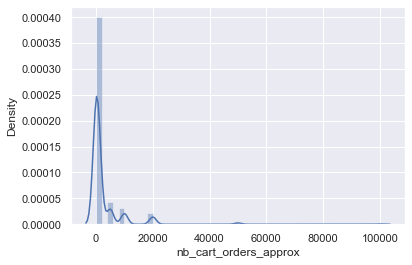

In [49]:
# 타겟인 판매량이 분포가 너무 크다.

sns.distplot(df[target])

In [50]:
df[target].value_counts()

10.0        4420
1000.0      2164
5000.0       716
10000.0      511
20000.0      345
50000.0       62
100000.0      13
Name: nb_cart_orders_approx, dtype: int64

In [51]:
# target_over_5000 = df[df[target] >= 5000]
# df.loc[target_over_5000.index, target] = 10000
# df[target].value_counts()

In [52]:
# sns.distplot(df[target])

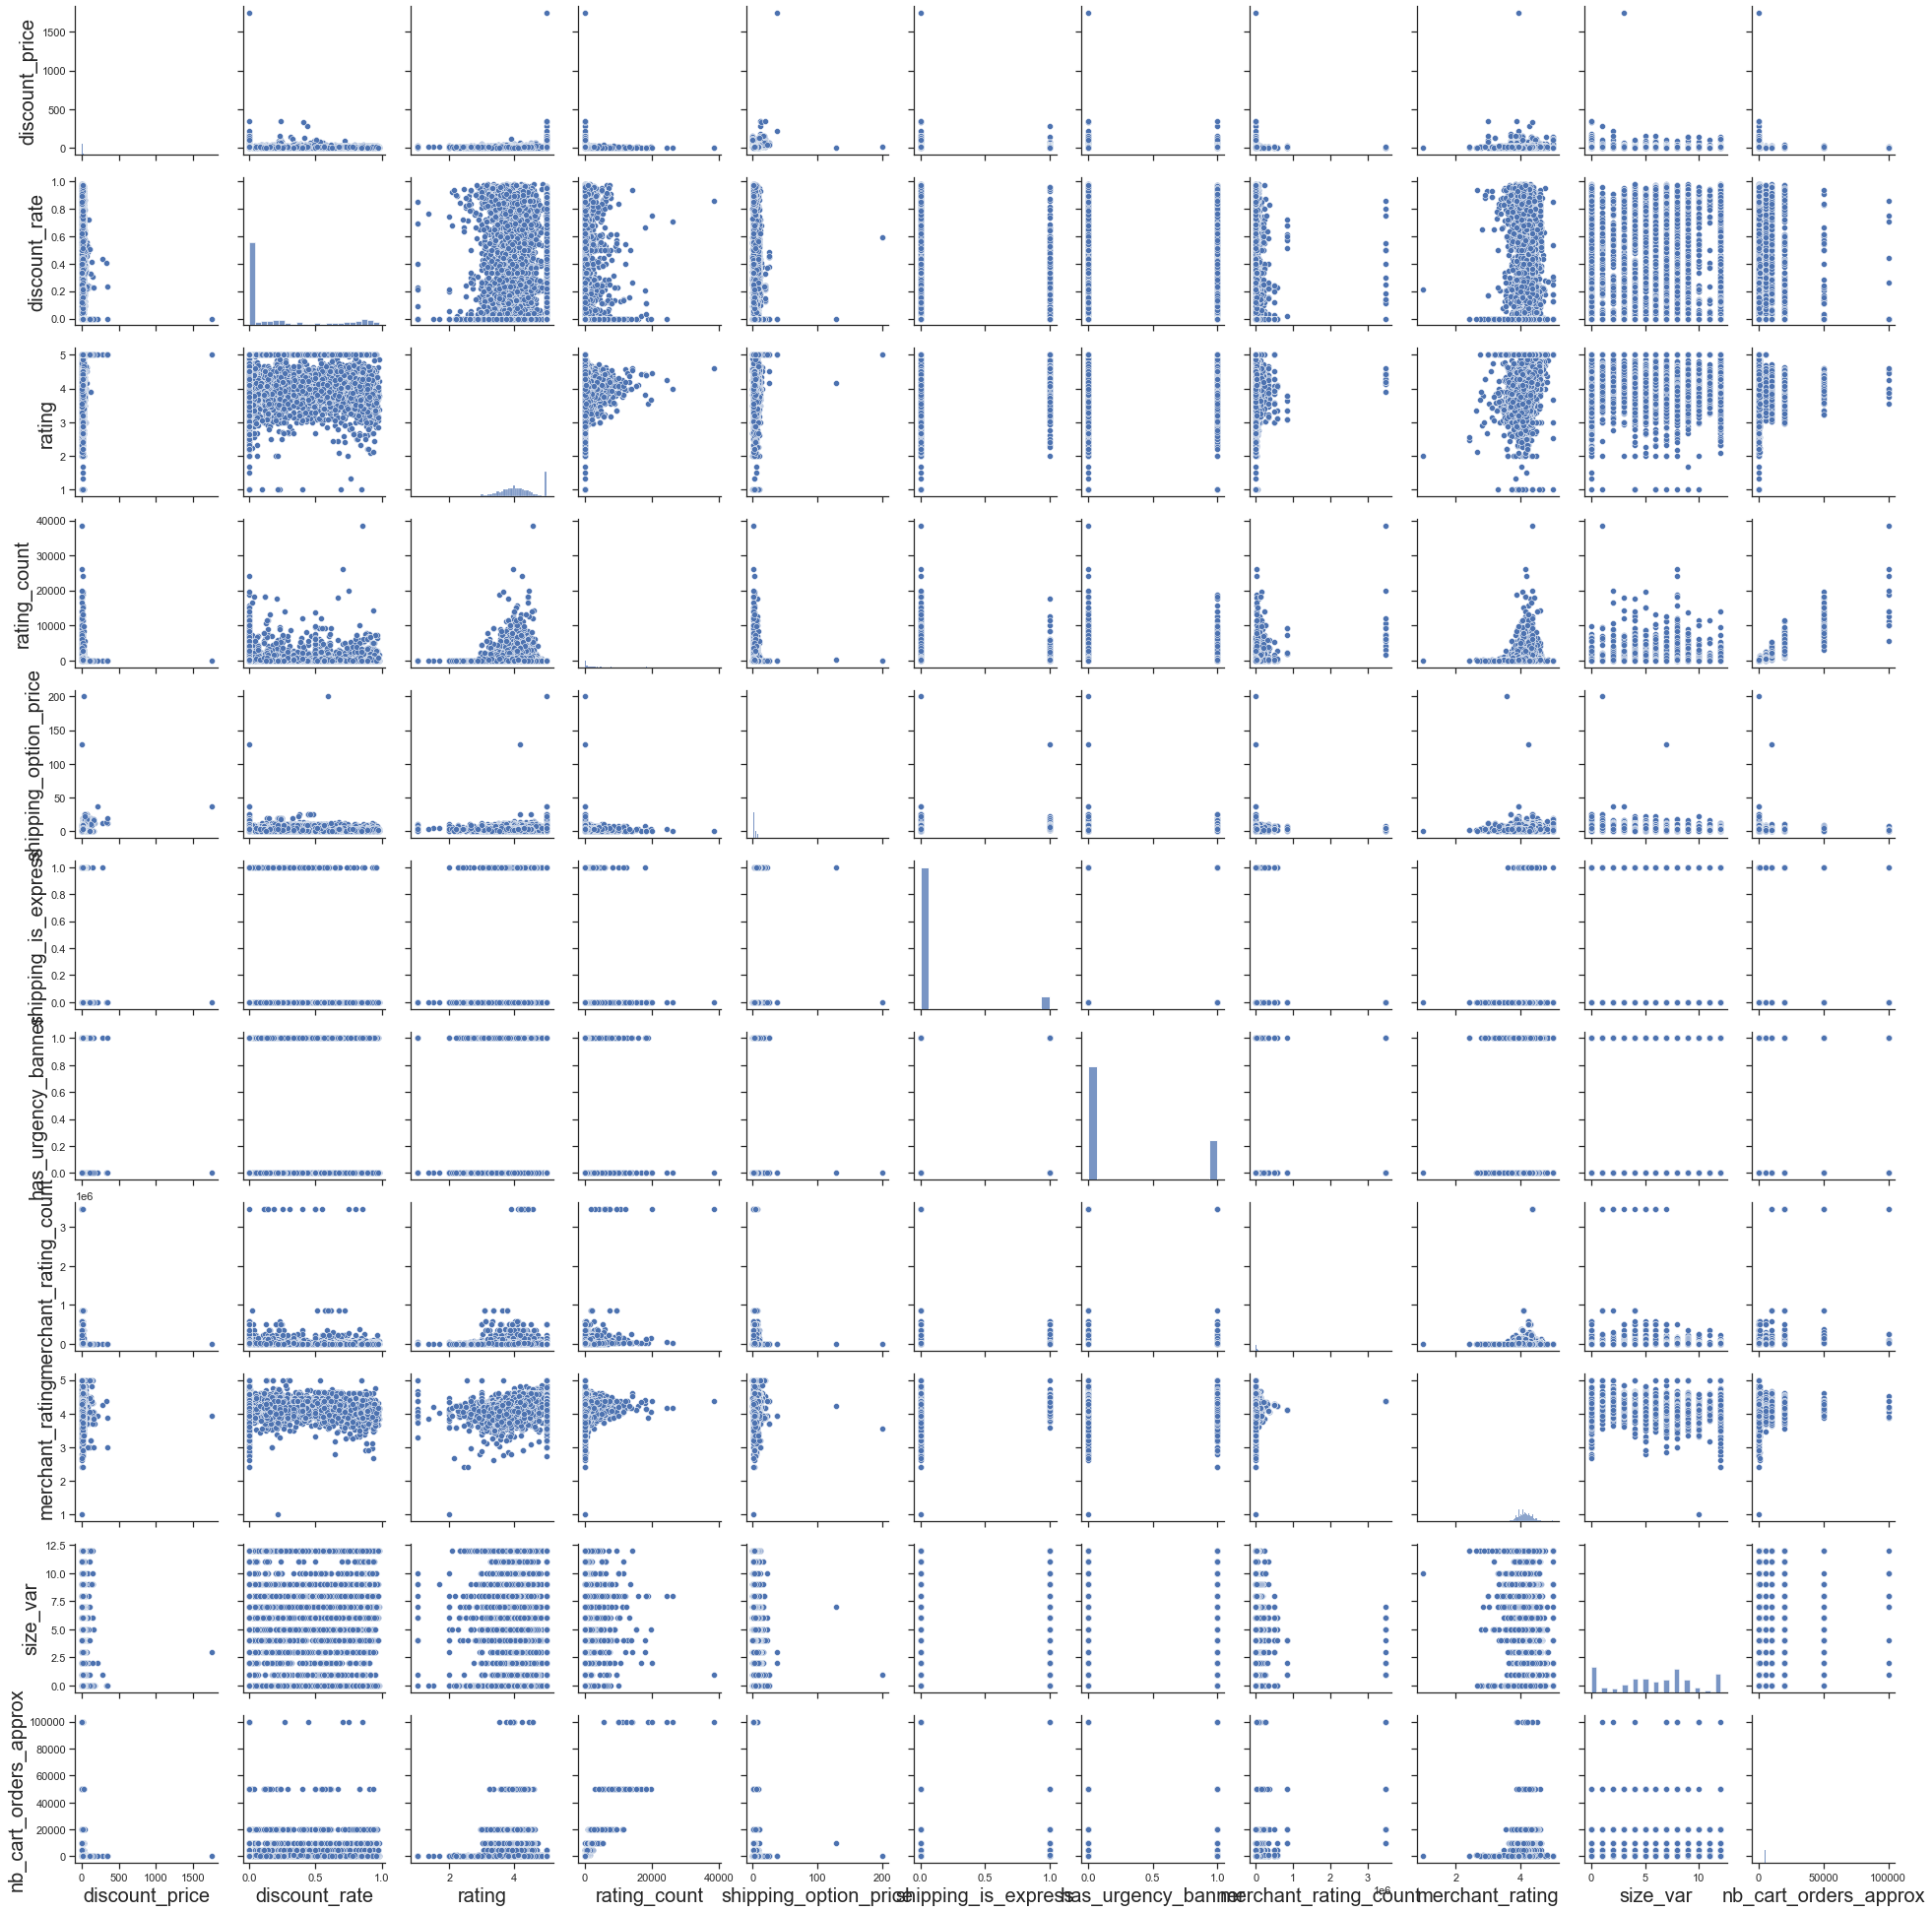

In [53]:
# scatter matrix

sns.set(style="ticks", color_codes=True)
plt.rcParams["axes.labelsize"] = 20
sns.pairplot(df)

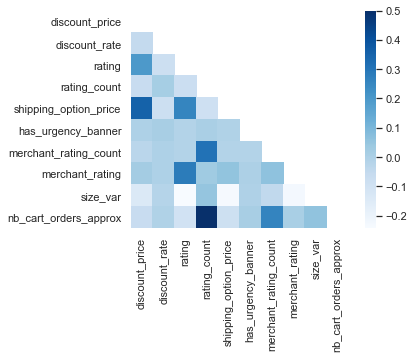

In [54]:
# correlation

corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.5, square=True, cmap="Blues")

<AxesSubplot:>

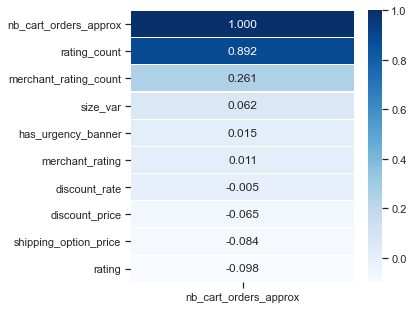

In [55]:
# correlation

corr = df.corr()[[target]].sort_values(by = target, ascending=False)

f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(corr, annot=True, fmt="0.3f", linewidths=0.1, ax=ax, cmap='Blues')

In [56]:
345 / 8231

0.04191471267160734

In [57]:
from sklearn.model_selection import train_test_split

train_val, test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 2)
train, val = train_test_split(train_val, train_size = 0.8, test_size = 0.2, random_state = 2)

X_train = train[feature]
y_train = train[target]
X_val = val[feature]
y_val = val[target]
X_test = test[feature]
y_test = test[target]

In [58]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from catboost import CatBoostClassifier
from category_encoders import CatBoostEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, accuracy_score
from catboost import CatBoostRegressor

In [59]:
# catboost 모델

pipe = Pipeline([
    ('prep',make_pipeline(CatBoostEncoder())),
    ('cat', CatBoostRegressor(iterations = 500
                               , random_state = 2
                               , od_type = 'Iter'
                               , od_wait = 20
                               , learning_rate = 0.2))])

pipe.fit(X_train, y_train)



0:	learn: 5938.0963935	total: 136ms	remaining: 1m 7s
1:	learn: 5205.2996132	total: 139ms	remaining: 34.5s
2:	learn: 4655.5542101	total: 141ms	remaining: 23.4s
3:	learn: 4205.0190994	total: 144ms	remaining: 17.8s
4:	learn: 3841.7920832	total: 146ms	remaining: 14.5s
5:	learn: 3580.1599461	total: 149ms	remaining: 12.3s
6:	learn: 3354.7613866	total: 152ms	remaining: 10.7s
7:	learn: 3183.6496071	total: 155ms	remaining: 9.52s
8:	learn: 3034.5186320	total: 157ms	remaining: 8.59s
9:	learn: 2928.5962993	total: 160ms	remaining: 7.86s
10:	learn: 2813.9520728	total: 163ms	remaining: 7.23s
11:	learn: 2731.8568041	total: 165ms	remaining: 6.71s
12:	learn: 2660.0104637	total: 167ms	remaining: 6.27s
13:	learn: 2600.9505601	total: 170ms	remaining: 5.89s
14:	learn: 2536.9631664	total: 172ms	remaining: 5.57s
15:	learn: 2502.5313076	total: 175ms	remaining: 5.28s
16:	learn: 2451.4671331	total: 177ms	remaining: 5.02s
17:	learn: 2406.5294586	total: 179ms	remaining: 4.79s
18:	learn: 2360.4700818	total: 181ms	r

204:	learn: 847.0576383	total: 619ms	remaining: 891ms
205:	learn: 843.6386230	total: 621ms	remaining: 887ms
206:	learn: 838.3115252	total: 623ms	remaining: 882ms
207:	learn: 834.4167564	total: 626ms	remaining: 878ms
208:	learn: 832.0205364	total: 628ms	remaining: 874ms
209:	learn: 829.2450499	total: 630ms	remaining: 870ms
210:	learn: 828.1885476	total: 632ms	remaining: 866ms
211:	learn: 826.5831630	total: 634ms	remaining: 862ms
212:	learn: 823.7725988	total: 637ms	remaining: 858ms
213:	learn: 822.0929753	total: 639ms	remaining: 854ms
214:	learn: 817.9900975	total: 641ms	remaining: 850ms
215:	learn: 815.4841749	total: 643ms	remaining: 846ms
216:	learn: 810.8664826	total: 645ms	remaining: 842ms
217:	learn: 808.3300491	total: 647ms	remaining: 837ms
218:	learn: 805.7428916	total: 650ms	remaining: 833ms
219:	learn: 803.9097861	total: 652ms	remaining: 829ms
220:	learn: 800.5364343	total: 654ms	remaining: 825ms
221:	learn: 799.4424644	total: 656ms	remaining: 821ms
222:	learn: 795.3401118	tota

406:	learn: 493.6108508	total: 1.11s	remaining: 253ms
407:	learn: 492.4163054	total: 1.11s	remaining: 250ms
408:	learn: 490.9686265	total: 1.11s	remaining: 247ms
409:	learn: 490.1045262	total: 1.11s	remaining: 244ms
410:	learn: 489.3938493	total: 1.11s	remaining: 242ms
411:	learn: 487.8172596	total: 1.12s	remaining: 239ms
412:	learn: 486.7411951	total: 1.12s	remaining: 236ms
413:	learn: 485.2041283	total: 1.12s	remaining: 233ms
414:	learn: 484.5241279	total: 1.12s	remaining: 230ms
415:	learn: 483.1671002	total: 1.13s	remaining: 228ms
416:	learn: 482.3449412	total: 1.13s	remaining: 225ms
417:	learn: 481.8891712	total: 1.13s	remaining: 222ms
418:	learn: 479.7764965	total: 1.13s	remaining: 219ms
419:	learn: 478.7552977	total: 1.14s	remaining: 216ms
420:	learn: 477.9575870	total: 1.14s	remaining: 213ms
421:	learn: 477.4635621	total: 1.14s	remaining: 211ms
422:	learn: 476.8752332	total: 1.14s	remaining: 208ms
423:	learn: 475.4675173	total: 1.14s	remaining: 205ms
424:	learn: 474.5037703	tota

Pipeline(steps=[('prep',
                 Pipeline(steps=[('catboostencoder',
                                  CatBoostEncoder(cols=['currency',
                                                        'shipping_is_express',
                                                        'origin_country',
                                                        'category']))])),
                ('cat',
                 <catboost.core.CatBoostRegressor object at 0x000001B925A94910>)])

In [62]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

In [67]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = mse_train ** 0.5
r2_train = r2_score(y_train, y_pred_train)

mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)
rmse_val = mse_val ** 0.5
r2_val = r2_score(y_val, y_pred_val)


mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = mse_test ** 0.5
r2_test = r2_score(y_test, y_pred_test)

metric_compare = pd.DataFrame([['MSE', mse_train, mse_val, mse_test],
                               ['MAE', mae_train, mae_val, mae_test], 
                               ['RMSE', rmse_train, rmse_val, rmse_test], 
                               ['R2', r2_train, r2_val, r2_test]], 
                              columns = ['Metric', 'Train', 'Val', 'Test'])
                             
metric_compare.set_index('Metric',inplace=True)
metric_compare

,Train,Val,Test
Metric,,,
MSE,1648645.364,12102726.537,10985322.449
MAE,532.707,1035.851,973.290
RMSE,1283.996,3478.897,3314.411
R2,0.965,0.799,0.832


## catboost 모델이 같은 조건에서 과적합이 조금 더 적다.